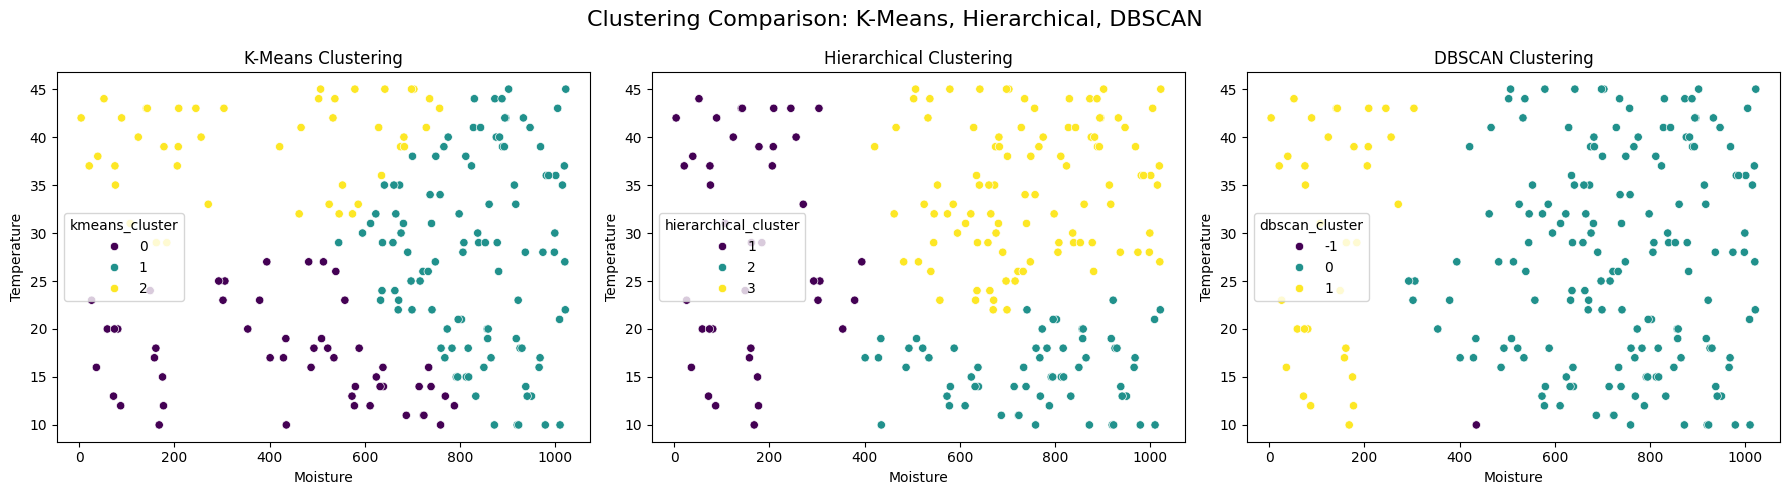

     moisture  temp  kmeans_cluster  hierarchical_cluster  dbscan_cluster
0         638    16               0                     2               0
1         522    18               0                     2               0
2         741    22               1                     2               0
3         798    32               1                     3               0
4         690    28               1                     3               0
..        ...   ...             ...                   ...             ...
195       941    13               1                     2               0
196       902    45               1                     3               0
197       894    42               1                     3               0
198      1022    45               1                     3               0
199       979    10               1                     2               0

[200 rows x 5 columns]


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data.csv")

# Data Preprocessing
# Select only numerical features for clustering
df_features = df.drop(columns=['crop', 'pump'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# 2. Hierarchical Clustering (Agglomerative)
# Perform hierarchical clustering and choose 3 clusters
linkage_matrix = linkage(df_scaled, method='ward')
df['hierarchical_cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

# 3. DBSCAN Clustering
# Using DBSCAN with default parameters; adjust eps and min_samples based on data for best results
dbscan = DBSCAN(eps=0.5, min_samples=2)
df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# 4. Plotting Clustering Results for Comparison
# Set up the subplot grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Clustering Comparison: K-Means, Hierarchical, DBSCAN', fontsize=16)

# K-Means Plot
sns.scatterplot(x=df['moisture'], y=df['temp'], hue=df['kmeans_cluster'], palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Moisture')
axes[0].set_ylabel('Temperature')

# Hierarchical Plot
sns.scatterplot(x=df['moisture'], y=df['temp'], hue=df['hierarchical_cluster'], palette='viridis', ax=axes[1])
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Moisture')
axes[1].set_ylabel('Temperature')

# DBSCAN Plot
sns.scatterplot(x=df['moisture'], y=df['temp'], hue=df['dbscan_cluster'], palette='viridis', ax=axes[2])
axes[2].set_title('DBSCAN Clustering')
axes[2].set_xlabel('Moisture')
axes[2].set_ylabel('Temperature')

plt.tight_layout()
plt.show()

# Print out the clustered data to inspect
print(df[['moisture', 'temp', 'kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster']])



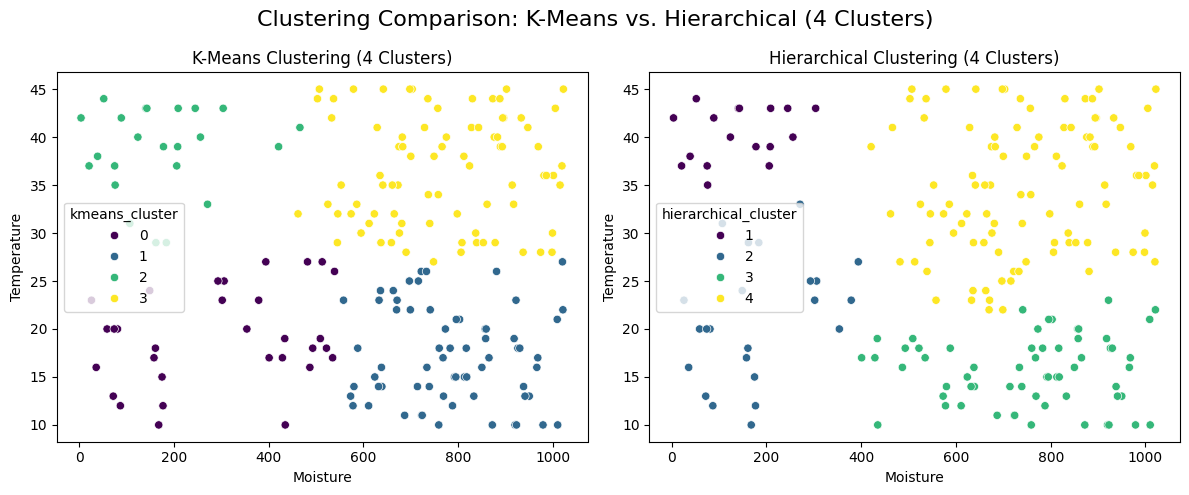

     moisture  temp  kmeans_cluster  hierarchical_cluster
0         638    16               1                     3
1         522    18               0                     3
2         741    22               1                     3
3         798    32               3                     4
4         690    28               3                     4
..        ...   ...             ...                   ...
195       941    13               1                     3
196       902    45               3                     4
197       894    42               3                     4
198      1022    45               3                     4
199       979    10               1                     3

[200 rows x 4 columns]


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data.csv")

# Data Preprocessing
# Select only numerical features for clustering
df_features = df.drop(columns=['crop', 'pump'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# 1. K-Means Clustering with 4 Clusters
kmeans = KMeans(n_clusters=4, random_state=0)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# 2. Hierarchical Clustering with 4 Clusters
linkage_matrix = linkage(df_scaled, method='ward')
df['hierarchical_cluster'] = fcluster(linkage_matrix, 4, criterion='maxclust')

# 3. Plotting Clustering Results for Comparison
# Set up the subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Clustering Comparison: K-Means vs. Hierarchical (4 Clusters)', fontsize=16)

# K-Means Plot
sns.scatterplot(x=df['moisture'], y=df['temp'], hue=df['kmeans_cluster'], palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering (4 Clusters)')
axes[0].set_xlabel('Moisture')
axes[0].set_ylabel('Temperature')

# Hierarchical Plot
sns.scatterplot(x=df['moisture'], y=df['temp'], hue=df['hierarchical_cluster'], palette='viridis', ax=axes[1])
axes[1].set_title('Hierarchical Clustering (4 Clusters)')
axes[1].set_xlabel('Moisture')
axes[1].set_ylabel('Temperature')

plt.tight_layout()
plt.show()

# Print out the clustered data to inspect
print(df[['moisture', 'temp', 'kmeans_cluster', 'hierarchical_cluster']])


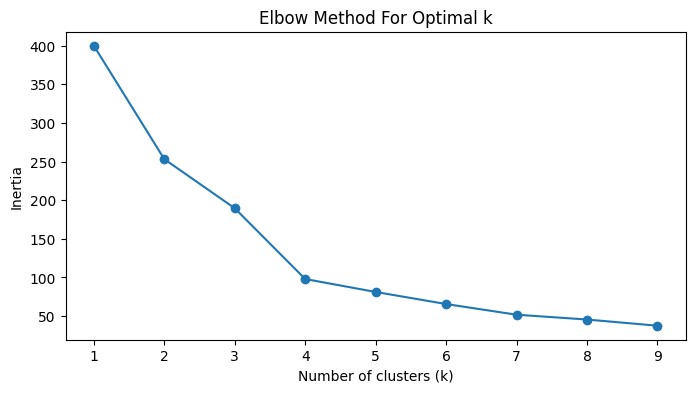

       crop  moisture  temp  pump  cluster
0    cotton       638    16     1        0
1    cotton       522    18     1        0
2    cotton       741    22     1        1
3    cotton       798    32     1        1
4    cotton       690    28     1        1
..      ...       ...   ...   ...      ...
195  cotton       941    13     1        1
196  cotton       902    45     1        1
197  cotton       894    42     1        1
198  cotton      1022    45     1        1
199  cotton       979    10     1        1

[200 rows x 5 columns]


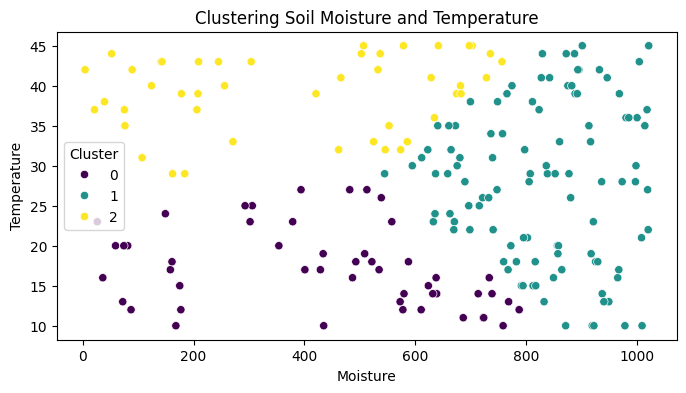

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
# Load data from CSV
df = pd.read_csv("data.csv")

# 2. Data Preprocessing
# Drop 'crop' column if focusing only on numerical features
df_features = df.drop(columns=['crop', 'pump'])  # Dropping 'pump' if it indicates active irrigation only
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# 3. Determining Optimal Clusters using Elbow Method
inertia = []
cluster_range = range(1, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

# 4. Applying KMeans Clustering
optimal_k = 3  # Assume we choose 3 clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['cluster'] = kmeans.fit_predict(df_scaled)

# 5. Analyze Cluster Results
# Print data with clusters
print(df)

# Plot clusters based on moisture and temperature
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['moisture'], y=df['temp'], hue=df['cluster'], palette='viridis')
plt.title("Clustering Soil Moisture and Temperature")
plt.xlabel("Moisture")
plt.ylabel("Temperature")
plt.legend(title="Cluster")
plt.show()
